In [9]:
import cv2
import os
import numpy as np
import seaborn as sns
import open3d as o3d
from matplotlib import pyplot as plt
from open3d.web_visualizer import draw
from mpl_toolkits.mplot3d import Axes3D
current_palette = sns.color_palette('bright',10)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [10]:
cube_red = o3d.geometry.TriangleMesh.create_box(1, 2, 4)
cube_red.compute_vertex_normals()
cube_red.paint_uniform_color((1.0, 0.0, 0.0))
draw(cube_red)

WebVisualizer(window_uid='window_0')

[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x7f194dcc6010 (threading is enabled)
[Open3D INFO] ICE servers: {"stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"}
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.


In [11]:
input_file = "input.ply"
pcd = o3d.io.read_point_cloud("./data/object_models/airplane.ply") # Read the point cloud

In [12]:
point_cloud_in_numpy = np.asarray(pcd.points) 

In [13]:
point_cloud_in_numpy

array([[-36.88546753,  -3.86585605, -30.71177483],
       [ -5.60835937,  42.01932442, -19.38919258],
       [-36.88546753,  12.74397945, -21.83363962],
       ...,
       [ 12.32480758,  30.1900351 , -16.54704725],
       [  4.0261354 ,  66.13349107, -16.54691196],
       [ 10.36748097, -36.59165842, -19.3884788 ]])

In [17]:
point_cloud_in_numpy[0:]

array([[-36.88546753,  -3.86585605, -30.71177483],
       [ -5.60835937,  42.01932442, -19.38919258],
       [-36.88546753,  12.74397945, -21.83363962],
       ...,
       [ 12.32480758,  30.1900351 , -16.54704725],
       [  4.0261354 ,  66.13349107, -16.54691196],
       [ 10.36748097, -36.59165842, -19.3884788 ]])

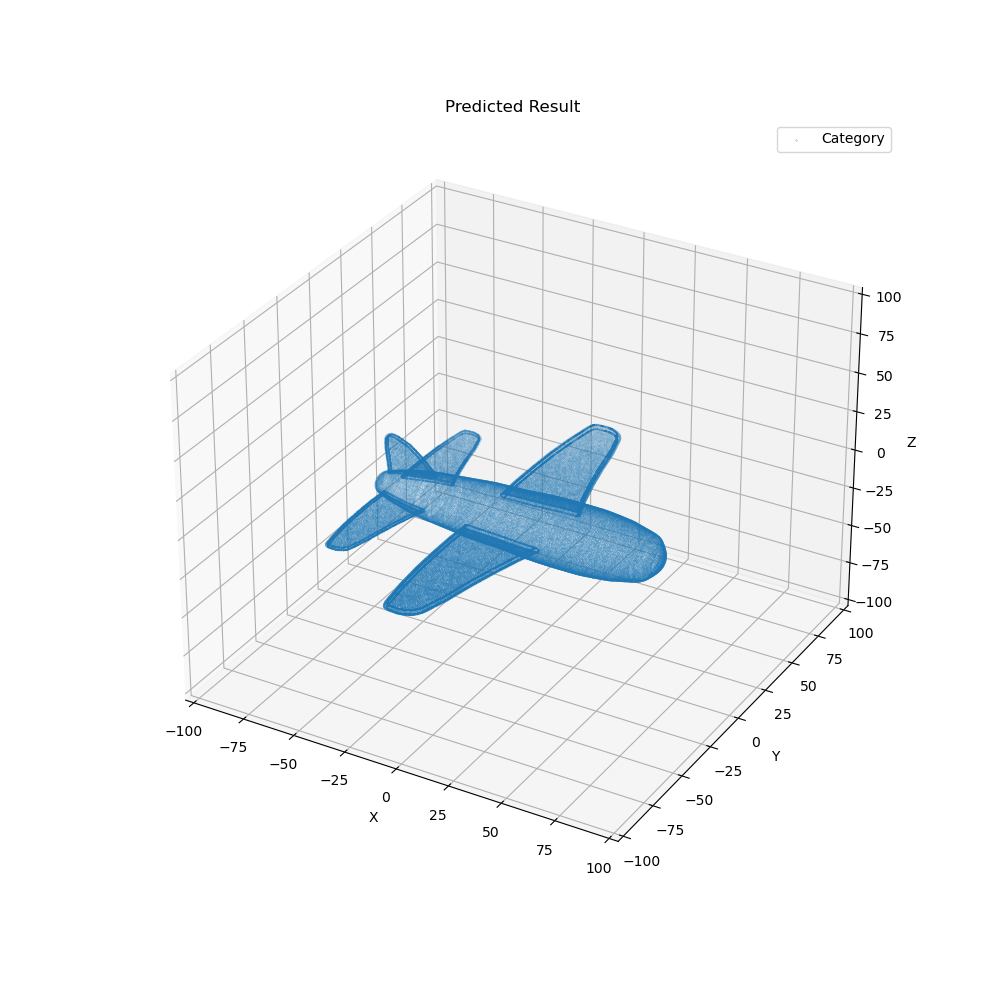

In [20]:
%matplotlib widget

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(point_cloud_in_numpy[:,0], point_cloud_in_numpy[:,1], point_cloud_in_numpy[:,2],marker='.', s=0.2, label='Category')

# for label in ground_truth_part_label:
#     pt = np.where(ground_truth[:,6] == label)
#     color = current_palette.as_hex()[ground_truth_part_label.index(label)]
#     ax.scatter(ground_truth[pt, 0], ground_truth[pt, 1], ground_truth[pt, 2],marker='.', s=150, label='Category '+ str(label))
    
    
ax.set_title('Predicted Result')
ax.legend()
plt.show()